In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [48]:
df = pd.read_csv("INvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [50]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


In [51]:
df.drop(["video_id", "thumbnail_link", "description"], axis=1, inplace=True)

In [52]:
df.shape

(37352, 13)

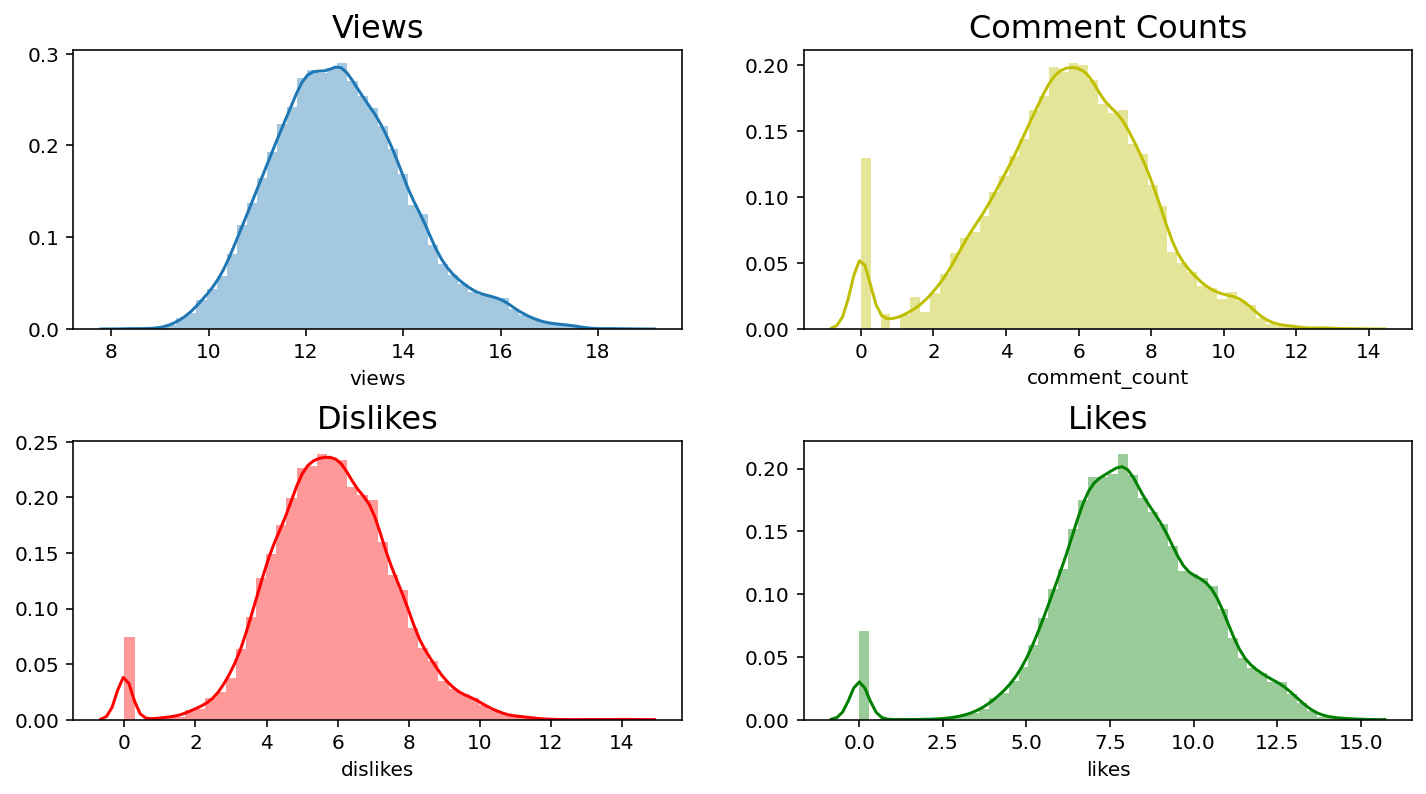

In [53]:
likes_log = np.log(df["likes"] + 1)
views_log = np.log(df["views"] + 1)
dislikes_log = np.log(df["dislikes"] + 1)
comment_log = np.log(df["comment_count"] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(views_log)
g1.set_title("Views", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(likes_log, color='green')
g2.set_title("Likes", fontsize=16)

plt.subplot(223)
g3 = sns.distplot(dislikes_log, color='r')
g3.set_title("Dislikes", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(comment_log, color='y')
g4.set_title("Comment Counts", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


plt.show()

In [54]:
df["category_id"].value_counts()

24    16712
25     5241
10     3858
23     3429
22     2624
1      1658
27     1227
26      845
17      731
28      552
43      205
29      105
2        72
20       66
30       16
19        8
15        3
Name: category_id, dtype: int64

In [55]:
categories = {
    1:"Film and Animation",
    2:"Cars and Vehicles",
    10:"Music",
    15:"Pets and Animals",
    17:"Sports",
    19:"Travel & Evnets",
    20:"Gaming",
    22:"People and Blogs",
    23:"Comedy",
    24:"Entertainment",
    25:"News & Politics",
    26:"Howto & Style",
    27:"Education",
    28:"Science and Technology",
    29:"Others",
    30:"Movies",
    43:"Shows"
}

df["categories"] = df["category_id"].map(categories)
df.drop(["category_id"], axis=1, inplace = True)
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,categories
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Film and Animation
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,News & Politics
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Entertainment
3,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,Comedy
4,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,Entertainment


In [56]:
df = df[df["video_error_or_removed"] != True]
df.drop(["video_error_or_removed", "comments_disabled", "ratings_disabled"], axis=1, inplace=True)

In [64]:
df["trending_date"] = pd.to_datetime(df["trending_date"], format='%y.%d.%m')
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,categories
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,Film and Animation
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,News & Politics
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,Entertainment
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,Comedy
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,Entertainment
